In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.metrics as metrics

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [9]:
df_HuRI=pd.read_csv("../data/HuRI-pLDDT.csv")
df_hurimap=pd.read_csv("../data/humap_ensembl_id.csv")
df_hurimap["Name"]=df_hurimap.Ensembl_id1+"-"+df_hurimap.Ensembl_id2
df_hurimap

Id1     Id2     Score      Ensembl_id1      Ensembl_id2  \
0      P46926  Q8TDQ7  1.000000  ENSG00000113552  ENSG00000163281   
1      P46926  Q9Y303  0.999751  ENSG00000113552  ENSG00000162066   
2      P43631  Q14954  1.000000  ENSG00000277885  ENSG00000276327   
3      P43631  Q14954  1.000000  ENSG00000277885  ENSG00000278120   
4      P43631  Q14954  1.000000  ENSG00000277885  ENSG00000284150   
...       ...     ...       ...              ...              ...   
13744  Q16799  Q92630  0.511102  ENSG00000139970  ENSG00000127334   
13745  Q9UMX0  O14745  0.511091  ENSG00000135018  ENSG00000109062   
13746  Q7Z3B3  Q9BVI0  0.509570  ENSG00000120071  ENSG00000025293   
13747  Q53TN4  Q9Y232  0.509415  ENSG00000071967  ENSG00000153046   
13748  Q9NWL6  P18433  0.508974  ENSG00000138381  ENSG00000132670   

                                  Name  
0      ENSG00000113552-ENSG00000163281  
1      ENSG00000113552-ENSG00000162066  
2      ENSG00000277885-ENSG00000276327  
3      ENSG00000277885-ENSG00000278120  
4      ENSG00000277885-ENSG00000284150  
...                                ...  
13744  ENSG00000139970-ENSG00000127334  
13745  ENSG00000135018-ENSG00000109062  
13746  ENSG00000120071-ENSG00000025293  
13747  ENSG00000071967-ENSG00000153046  
13748  ENSG00000138381-ENSG00000132670  

[13749 rows x 6 columns]

In [10]:
a=df_hurimap[["Id1","Ensembl_id1"]]
b=df_hurimap[["Id2","Ensembl_id2"]]
a=a.rename(columns={"Id1":"UniProt","Ensembl_id1":"Ensembl"})
b=b.rename(columns={"Id2":"UniProt","Ensembl_id2":"Ensembl"})

df_ensmap=pd.concat([a,b]).drop_duplicates()
df_ensmap

UniProt          Ensembl
0      P46926  ENSG00000113552
2      P43631  ENSG00000277885
6      P43631  ENSG00000275452
10     P43631  ENSG00000278300
35     H3BUK9  ENSG00000230031
...       ...              ...
13743  A6NDG6  ENSG00000184207
13744  Q92630  ENSG00000127334
13745  O14745  ENSG00000109062
13746  Q9BVI0  ENSG00000025293
13748  P18433  ENSG00000132670

[5584 rows x 2 columns]

In [11]:
len(df_ensmap.Ensembl.unique())

5562

In [12]:
df_temp=pd.merge(df_HuRI,df_ensmap,left_on=["id1"],right_on=["Ensembl"],how="outer")
df_new=pd.merge(df_temp,df_ensmap,left_on=["id2"],right_on=["Ensembl"],how="outer")
df_HuRI=df_new.dropna()
df_HuRI["Name1"]=df_HuRI["UniProt_x"]+"-"+df_HuRI["UniProt_y"]
df_HuRI["Name2"]=df_HuRI["UniProt_y"]+"-"+df_HuRI["UniProt_x"]


/tmp/ipykernel_2485513/195806057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HuRI["Name1"]=df_HuRI["UniProt_x"]+"-"+df_HuRI["UniProt_y"]
/tmp/ipykernel_2485513/195806057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HuRI["Name2"]=df_HuRI["UniProt_y"]+"-"+df_HuRI["UniProt_x"]


In [13]:
df_HuRI

Name              id1              id2  \
23     ENSG00000004975-ENSG00000004975  ENSG00000004975  ENSG00000004975   
58     ENSG00000007237-ENSG00000007237  ENSG00000007237  ENSG00000007237   
73     ENSG00000008441-ENSG00000008441  ENSG00000008441  ENSG00000008441   
96     ENSG00000011304-ENSG00000011304  ENSG00000011304  ENSG00000011304   
110    ENSG00000008256-ENSG00000012822  ENSG00000008256  ENSG00000012822   
...                                ...              ...              ...   
64624  ENSG00000134686-ENSG00000277258  ENSG00000134686  ENSG00000277258   
64626  ENSG00000204227-ENSG00000277258  ENSG00000204227  ENSG00000277258   
64716  ENSG00000057704-ENSG00000278057  ENSG00000057704  ENSG00000278057   
64718  ENSG00000140743-ENSG00000278057  ENSG00000140743  ENSG00000278057   
64721  ENSG00000197343-ENSG00000278057  ENSG00000197343  ENSG00000278057   

       NumRes   IF_plDDT      plDDT UniProt_x        Ensembl_x UniProt_y  \
23      630.0  53.617842  50.071794    O14641  ENSG00000004975    O14641   
58      450.0  87.330127  76.765087    O60861  ENSG00000007237    O60861   
73      332.0  79.761591  57.859305    Q14938  ENSG00000008441    Q14938   
96      133.0  67.104488  72.049870    P26599  ENSG00000011304    P26599   
110      61.0  55.951605  75.354632    O43739  ENSG00000008256    Q9P1Z2   
...       ...        ...        ...       ...              ...       ...   
64624   168.0  78.907462  51.655516    Q8IXK0  ENSG00000134686    P35227   
64626   214.0  86.401316  66.041224    Q06587  ENSG00000204227    P35227   
64716   433.0  75.482244  64.901093    Q9ULS5  ENSG00000057704    O15482   
64718   125.0  70.031979  70.200383    Q01850  ENSG00000140743    O15482   
64721   229.0  69.321870  63.355792    Q8N720  ENSG00000197343    O15482   

             Ensembl_y          Name1          Name2  
23     ENSG00000004975  O14641-O14641  O14641-O14641  
58     ENSG00000007237  O60861-O60861  O60861-O60861  
73     ENSG00000008441  Q14938-Q14938  Q14938-Q14938  
96     ENSG00000011304  P26599-P26599  P26599-P26599  
110    ENSG00000012822  O43739-Q9P1Z2  Q9P1Z2-O43739  
...                ...            ...            ...  
64624  ENSG00000277258  Q8IXK0-P35227  P35227-Q8IXK0  
64626  ENSG00000277258  Q06587-P35227  P35227-Q06587  
64716  ENSG00000278057  Q9ULS5-O15482  O15482-Q9ULS5  
64718  ENSG00000278057  Q01850-O15482  O15482-Q01850  
64721  ENSG00000278057  Q8N720-O15482  O15482-Q8N720  

[7916 rows x 12 columns]

In [14]:
# Looking for homodimers
df_HuRI[df_HuRI.Name1==df_HuRI.Name2]


Name              id1              id2  \
23     ENSG00000004975-ENSG00000004975  ENSG00000004975  ENSG00000004975   
58     ENSG00000007237-ENSG00000007237  ENSG00000007237  ENSG00000007237   
73     ENSG00000008441-ENSG00000008441  ENSG00000008441  ENSG00000008441   
96     ENSG00000011304-ENSG00000011304  ENSG00000011304  ENSG00000011304   
127    ENSG00000015479-ENSG00000015479  ENSG00000015479  ENSG00000015479   
...                                ...              ...              ...   
57867  ENSG00000214717-ENSG00000214717  ENSG00000214717  ENSG00000214717   
60129  ENSG00000239282-ENSG00000239282  ENSG00000239282  ENSG00000239282   
61771  ENSG00000248746-ENSG00000248746  ENSG00000248746  ENSG00000248746   
64245  ENSG00000274276-ENSG00000274276  ENSG00000274276  ENSG00000274276   
64607  ENSG00000276644-ENSG00000276644  ENSG00000276644  ENSG00000276644   

       NumRes   IF_plDDT      plDDT UniProt_x        Ensembl_x UniProt_y  \
23      630.0  53.617842  50.071794    O14641  ENSG00000004975    O14641   
58      450.0  87.330127  76.765087    O60861  ENSG00000007237    O60861   
73      332.0  79.761591  57.859305    Q14938  ENSG00000008441    Q14938   
96      133.0  67.104488  72.049870    P26599  ENSG00000011304    P26599   
127     477.0  76.943424  53.717330    P43243  ENSG00000015479    P43243   
...       ...        ...        ...       ...              ...       ...   
57867   236.0  77.461017  74.962718    O96006  ENSG00000214717    O96006   
60129   106.0  93.492233  86.570439    Q8WTX7  ENSG00000239282    Q8WTX7   
61771  1790.0  72.238518  69.422560    Q08043  ENSG00000248746    Q08043   
64245   390.0  87.939959  83.814103    P0DN79  ENSG00000274276    P0DN79   
64607   373.0  75.411740  49.692467    Q9UI36  ENSG00000276644    Q9UI36   

             Ensembl_y          Name1          Name2  
23     ENSG00000004975  O14641-O14641  O14641-O14641  
58     ENSG00000007237  O60861-O60861  O60861-O60861  
73     ENSG00000008441  Q14938-Q14938  Q14938-Q14938  
96     ENSG00000011304  P26599-P26599  P26599-P26599  
127    ENSG00000015479  P43243-P43243  P43243-P43243  
...                ...            ...            ...  
57867  ENSG00000214717  O96006-O96006  O96006-O96006  
60129  ENSG00000239282  Q8WTX7-Q8WTX7  Q8WTX7-Q8WTX7  
61771  ENSG00000248746  Q08043-Q08043  Q08043-Q08043  
64245  ENSG00000274276  P0DN79-P0DN79  P0DN79-P0DN79  
64607  ENSG00000276644  Q9UI36-Q9UI36  Q9UI36-Q9UI36  

[304 rows x 12 columns]

In [15]:
# This looses to maNY
# Now we try to marge three times
#df_h1=pd.merge(df_HuRI,df_hurimap,left_on=["Name"],right_in=["Name"],how="inner")
#df_h1=pd.merge(df_HuRI,df_hurimap,left_on=["Name1"],right_in=["Name"],how="inner")
#pd.merge(df_HuRI,df,left_on=["Name"],right_on=["Name"],how="inner")
#df_h

In [16]:
df=pd.read_csv("../data/evaluation.csv")
df_negpLDDT=pd.read_csv("../data/negatome-pLDDT.csv")
df_negseqlen=pd.read_csv("../data/negatome-seqlen.csv",sep=",",names=["Name","SeqLen1","SeqLen2"])
df_negseqlen["SeqLen"]=df_negseqlen.SeqLen1+df_negseqlen.SeqLen2
df_hurimap=pd.read_csv("../data/merged_evaluation.csv")
df_evidence=pd.read_csv("../data/evidence.csv",sep="\s") #,engine=python)

/tmp/ipykernel_2485513/2363253737.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_evidence=pd.read_csv("../data/evidence.csv",sep="\s") #,engine=python)


In [17]:
df_negatome=pd.merge(df_negpLDDT,df_negseqlen,on=["Name"],how="inner")
df_negatome

Name  NumRes   IF_plDDT      plDDT  SeqLen1  SeqLen2  SeqLen
0     A1X4Q1-O14745     124  72.274413  65.719998      230    358.0   588.0
1     A1X4Q1-Q15599      91  72.297193  66.258480      230    337.0   567.0
2     A4IFA9-Q07731      52  87.512360  73.771585      394    211.0   605.0
3     A6NIX2-O60663      66  63.069357  63.382271      430    402.0   832.0
4     B2ZZS9-H2L8A6      86  66.239176  75.678471      400    745.0  1145.0
...             ...     ...        ...        ...      ...      ...     ...
1798  Q9YP87-P43488      50  68.312522  73.786038      186    198.0   384.0
1799  Q9YP87-P48023      85  55.393979  75.154571      186    281.0   467.0
1800  Q9YP87-P50591     111  81.650821  73.487518      186    281.0   467.0
1801  Q9YP87-P50592     170  67.657178  72.455990      186    291.0   477.0
1802  Q9YP87-Q06643     111  72.448837  73.137025      186    244.0   430.0

[1803 rows x 7 columns]

In [18]:
df_merged=pd.merge(df,df_hurimap,on=["Name"],how="outer")
df_merged=df_merged.rename(columns={
    "id1_x":"Gene1",
    "id2_x":"Gene2",
    "id1_y":"id1",
    "id2_y":"id2",
    "id1_x_x":"Gene1",
    "id2_x_x":"Gene2",
    "id1_y_y":"id1",
    "id2_y_y":"id2",
})
df=df_merged
df["Gene"]= np.where(df.Gene1.notna(), True, False)
df_gene=df[df.Gene]

In [19]:
df_evidence=df_evidence.rename(columns={"pairs":"Name"})
#print (df_evidence)
df_merged=pd.merge(df,df_evidence,on=["Name"],how="inner")
df=df_merged
#df["Gene"]= np.where(df.Gene1.notna(), True, False)
#df_merged
df["Int-Stru"]=np.where(df.interactome=="Structure", True, False)
df["Int-Dom"]=np.where(df.interactome=="Dom_dom_model", True, False)
df["Int-Model"]=np.where(df.interactome=="Model", True, False)
df["Int-NoStr"]=np.where(df.interactome=="0", True, False)


In [20]:
df

Unnamed: 0_x           Name  DockQ  MM  MMall  MMreorder  DockQreorder  \
0              9810  A0AVF1-Q86WT1    NaN NaN    NaN        NaN           NaN   
1              9831  A0JLT2-O43513    NaN NaN    NaN        NaN           NaN   
2              3693  A0JLT2-O60244    NaN NaN    NaN        NaN           NaN   
3              1450  A0JLT2-O75448    NaN NaN    NaN        NaN           NaN   
4              5758  A0JLT2-O95402    NaN NaN    NaN        NaN           NaN   
...             ...            ...    ...  ..    ...        ...           ...   
10242          7341  Q9Y6R4-O75293    NaN NaN    NaN        NaN           NaN   
10243          5364  Q9Y6W5-Q96F07    NaN NaN    NaN        NaN           NaN   
10244          6188  Q9Y6W5-Q9Y2A7    NaN NaN    NaN        NaN           NaN   
10245          1453  Q9Y6X9-Q86VD1    NaN NaN    NaN        NaN           NaN   
10246          8602  Q9Y6Y0-Q14558    NaN NaN    NaN        NaN           NaN   

       DockQall File  PDB  ... if_plddt cross32 crosstotal  intact_y2h  \
0           NaN  NaN  NaN  ...       83       0          0           0   
1           NaN  NaN  NaN  ...       79       0          0           0   
2           NaN  NaN  NaN  ...       69       0          0           0   
3           NaN  NaN  NaN  ...       69       0          0           0   
4           NaN  NaN  NaN  ...       53       0          0           0   
...         ...  ...  ...  ...      ...     ...        ...         ...   
10242       NaN  NaN  NaN  ...       70       0          0           0   
10243       NaN  NaN  NaN  ...       73       0          0           0   
10244       NaN  NaN  NaN  ...       69       0          0           0   
10245       NaN  NaN  NaN  ...       72       0          0           0   
10246       NaN  NaN  NaN  ...       61       0          0           0   

       biogridy2h  interactome  Int-Stru  Int-Dom  Int-Model Int-NoStr  
0               0            0     False    False      False      True  
1               0            0     False    False      False      True  
2               0            0     False    False      False      True  
3               0            0     False    False      False      True  
4               0            0     False    False      False      True  
...           ...          ...       ...      ...        ...       ...  
10242           1            0     False    False      False      True  
10243           0            0     False    False      False      True  
10244           0            0     False    False      False      True  
10245           0            0     False    False      False      True  
10246           0            0     False    False      False      True  

[10247 rows x 44 columns]

In [21]:
df["SumLogID_pLDDT"]=df.IF_plDDT*np.log(df.NumRes)
df["SumIF"]=df.NumRes*df.IF_plDDT/100
df_negatome["SumIF"]=df_negatome.NumRes*df_negatome.IF_plDDT/100

/home/arnee/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
minreses=[1,2,5,10,20,30,50]
minrescols=[]
minIFcols=[]
for i in minreses:
    df["minres-"+str(i)]= np.where(df.NumRes>i, 1, 0)
    df_negatome["minres-"+str(i)]= np.where(df_negatome.NumRes>i, 1, 0)
    minrescols+=["minres-"+str(i)]
    df["IFmin-"+str(i)]=df["IF_plDDT"]*df["minres-"+str(i)]
    df_negatome["IFmin-"+str(i)]=df_negatome["IF_plDDT"]*df_negatome["minres-"+str(i)]
    minIFcols+=["IFmin-"+str(i)]

In [23]:
df["Struct"]= np.where(df.DockQ.notna(), True, False)
df_struct=df[df.DockQ.notna()]
df_gene=df[df.Gene]
df_nogene=df[df.Gene==False]
df_nostruct=df[df.DockQ.isna()]
#df_struct["Good"]= np.where(df_struct.DockQ>0.23, True, False)
#df_struct["TMGood"]= np.where(df_struct.MMall>0.7, True, False)
df_struct["GoodAll"]= np.where(df_struct.DockQ>0.23, True, False)
df_struct["TMGoodAll"]= np.where(df_struct.MMall>0.7, True, False)
df_corr=df_struct[df_struct.GoodAll==True]
df_incorr=df_struct[df_struct.GoodAll==False]

/tmp/ipykernel_2485513/1006665696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_struct["GoodAll"]= np.where(df_struct.DockQ>0.23, True, False)
/tmp/ipykernel_2485513/1006665696.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_struct["TMGoodAll"]= np.where(df_struct.MMall>0.7, True, False)


/tmp/ipykernel_2485513/838679568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_corr.IF_plDDT,label="Correct Model")
/tmp/ipykernel_2485513/838679568.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_incorr.IF_plDDT,label="Incorrect Model")
/tmp/ipykernel_2485513/838679568.py:3: Use

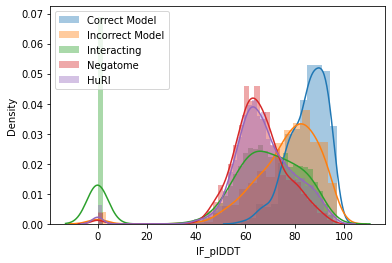

In [24]:
sns.distplot(df_corr.IF_plDDT,label="Correct Model")
sns.distplot(df_incorr.IF_plDDT,label="Incorrect Model")
sns.distplot(df_nostruct.IF_plDDT,label="Interacting")
sns.distplot(df_negatome.IF_plDDT,label="Negatome")
sns.distplot(df_HuRI.IF_plDDT,label="HuRI")
plt.legend()

plt.savefig("pLDDT.png")


In [25]:
df.keys()

Index(['Unnamed: 0_x', 'Name', 'DockQ', 'MM', 'MMall', 'MMreorder',
       'DockQreorder', 'DockQall', 'File', 'PDB', 'Chain1', 'Chain2',
       'ModelType', 'SeqLen1', 'SeqLen2', 'SeqLen', 'NumRes', 'IF_plDDT',
       'plDDT', 'Dataset', 'NumResOverlap', 'IF_plDDTOverlap', 'plDDTOverlap',
       'SumIF', 'id1', 'id2', 'pDockQ', 'Unnamed: 0_y', 'id1', 'id2', 'Gene1',
       'Gene2', 'Gene', 'nif', 'if_plddt', 'cross32', 'crosstotal',
       'intact_y2h', 'biogridy2h', 'interactome', 'Int-Stru', 'Int-Dom',
       'Int-Model', 'Int-NoStr', 'SumLogID_pLDDT', 'minres-1', 'IFmin-1',
       'minres-2', 'IFmin-2', 'minres-5', 'IFmin-5', 'minres-10', 'IFmin-10',
       'minres-20', 'IFmin-20', 'minres-30', 'IFmin-30', 'minres-50',
       'IFmin-50', 'Struct'],
      dtype='object')

/tmp/ipykernel_2485513/3060463541.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gene.IF_plDDT,label="Y2H")
/tmp/ipykernel_2485513/3060463541.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_nogene.IF_plDDT,label="NO-Y2H")
/tmp/ipykernel_2485513/3060463541.py:3: UserWarning: 

`dis

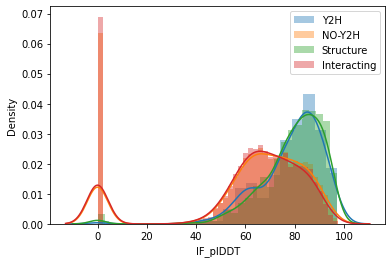

In [26]:
sns.distplot(df_gene.IF_plDDT,label="Y2H")
sns.distplot(df_nogene.IF_plDDT,label="NO-Y2H")
sns.distplot(df_struct.IF_plDDT,label="Structure")
sns.distplot(df_nostruct.IF_plDDT,label="Interacting")

#sns.distplot(df_nostruct.IF_plDDT,label="Interacting")
#sns.distplot(df_negatome.IF_plDDT,label="Negatome")
plt.legend()

plt.savefig("pLDDT.png")


/tmp/ipykernel_2485513/1556900207.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Int-Stru"]]["IF_plDDT"],label="Structure")
/tmp/ipykernel_2485513/1556900207.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Int-Dom"]]["IF_plDDT"],label="Domain-Domain")
/tmp/ipykernel_248551

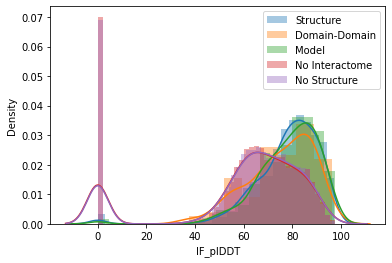

In [27]:
sns.distplot(df[df["Int-Stru"]]["IF_plDDT"],label="Structure")
sns.distplot(df[df["Int-Dom"]]["IF_plDDT"],label="Domain-Domain")
sns.distplot(df[df["Int-Model"]]["IF_plDDT"],label="Model")
sns.distplot(df[df["Int-NoStr"]]["IF_plDDT"],label="No Interactome")
#sns.distplot(df[df["Struct"]]["IF_plDDT"],label="Structure - PDB")
sns.distplot(df_nostruct.IF_plDDT,label="No Structure")

#sns.distplot(df_nostruct.IF_plDDT,label="Interacting")
#sns.distplot(df_negatome.IF_plDDT,label="Negatome")
plt.legend()

#plt.savefig("pLDDT.png")
plt.savefig("Interactome.png")


In [28]:
df.keys()

Index(['Unnamed: 0_x', 'Name', 'DockQ', 'MM', 'MMall', 'MMreorder',
       'DockQreorder', 'DockQall', 'File', 'PDB', 'Chain1', 'Chain2',
       'ModelType', 'SeqLen1', 'SeqLen2', 'SeqLen', 'NumRes', 'IF_plDDT',
       'plDDT', 'Dataset', 'NumResOverlap', 'IF_plDDTOverlap', 'plDDTOverlap',
       'SumIF', 'id1', 'id2', 'pDockQ', 'Unnamed: 0_y', 'id1', 'id2', 'Gene1',
       'Gene2', 'Gene', 'nif', 'if_plddt', 'cross32', 'crosstotal',
       'intact_y2h', 'biogridy2h', 'interactome', 'Int-Stru', 'Int-Dom',
       'Int-Model', 'Int-NoStr', 'SumLogID_pLDDT', 'minres-1', 'IFmin-1',
       'minres-2', 'IFmin-2', 'minres-5', 'IFmin-5', 'minres-10', 'IFmin-10',
       'minres-20', 'IFmin-20', 'minres-30', 'IFmin-30', 'minres-50',
       'IFmin-50', 'Struct'],
      dtype='object')

/tmp/ipykernel_2485513/232785529.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["cross32"]>0]["IF_plDDT"],label="Cross32>0")
/tmp/ipykernel_2485513/232785529.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["crosstotal"]>0]["IF_plDDT"],label="crosstotal>0")
/tmp/ipykernel_248

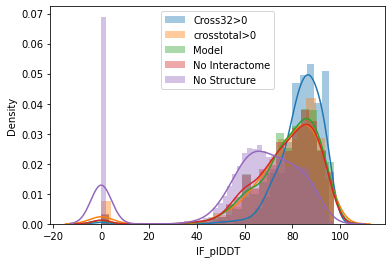

In [29]:
sns.distplot(df[df["cross32"]>0]["IF_plDDT"],label="Cross32>0")
sns.distplot(df[df["crosstotal"]>0]["IF_plDDT"],label="crosstotal>0")
sns.distplot(df[df["intact_y2h"]>0]["IF_plDDT"],label="Model")
sns.distplot(df[df["biogridy2h"]>0]["IF_plDDT"],label="No Interactome")
#sns.distplot(df[df["Struct"]>0]["IF_plDDT"],label="Structure - PDB")
sns.distplot(df_nostruct.IF_plDDT,label="No Structure")

#sns.distplot(df_nostruct.IF_plDDT,label="Interacting")
#sns.distplot(df_negatome.IF_plDDT,label="Negatome")
plt.legend()

#plt.savefig("pLDDT.png")
plt.savefig("Evidence.png")


/tmp/ipykernel_2485513/2372692938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df_corr.NumRes,label="Correct Model")
/tmp/ipykernel_2485513/2372692938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_incorr.NumRes,label="Incorrect Model")
/tmp/ipykernel_2485513/2372692938.py:3: U

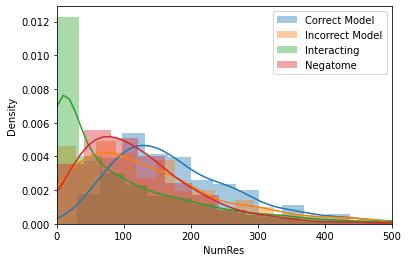

In [30]:
ax=sns.distplot(df_corr.NumRes,label="Correct Model")
sns.distplot(df_incorr.NumRes,label="Incorrect Model")
sns.distplot(df_nostruct.NumRes,label="Interacting")
sns.distplot(df_negatome.NumRes,label="Negatome")
ax.set_xlim([0,500])
plt.legend()
plt.savefig("NumRes.png")


/tmp/ipykernel_2485513/3367028478.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df_corr.SumIF,label="Correct Model")
/tmp/ipykernel_2485513/3367028478.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_incorr.SumIF,label="Incorrect Model")
/tmp/ipykernel_2485513/3367028478.py:3: Use

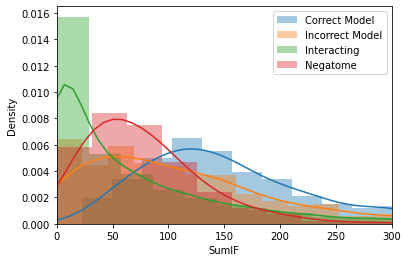

<Figure size 432x288 with 0 Axes>

In [31]:
ax=sns.distplot(df_corr.SumIF,label="Correct Model")
sns.distplot(df_incorr.SumIF,label="Incorrect Model")
sns.distplot(df_nostruct.SumIF,label="Interacting")
sns.distplot(df_negatome.SumIF,label="Negatome")
#ax.set_xscale('log')
ax.set_xlim(0,300)
plt.legend()
plt.show()
plt.savefig("SumIF.png")


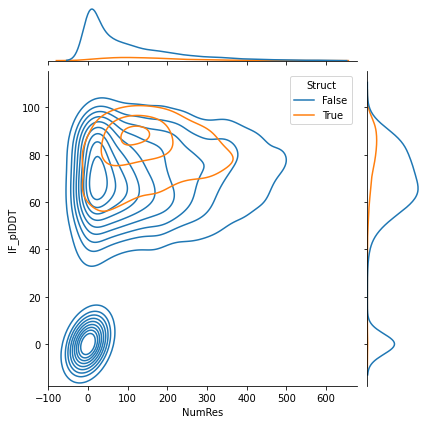

In [32]:
sns.jointplot(data=df[df.NumRes<600],x="NumRes",y="IF_plDDT",hue="Struct",kind="kde")
plt.savefig("NumRes-IF-struct.png")

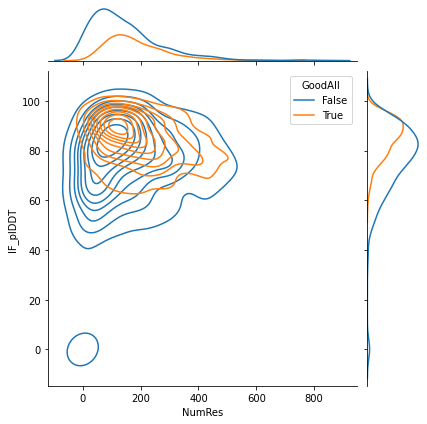

In [33]:
sns.jointplot(data=df_struct,x="NumRes",y="IF_plDDT",hue="GoodAll",kind="kde")
plt.savefig("NumRes-IF-good.png")

In [34]:
tempdf=df_struct.dropna(subset=["IF_plDDT","SumIF","NumRes"])
tempdf

Unnamed: 0_x           Name  DockQ       MM    MMall  MMreorder  \
74                2  O00231-O00487  0.510  0.64363  0.76284    0.64120   
75                3  O00231-Q15008  0.006  0.94567  0.94567    0.94567   
79                4  O00232-O00231  0.123  0.56706  0.73652    0.56751   
80                5  O00232-O00487  0.012  0.50276  0.71872    0.50227   
81                6  O00232-P51665  0.355  0.58063  0.76616    0.58130   
...             ...            ...    ...      ...      ...        ...   
10191          1258  Q9Y676-P82650  0.011  0.83740  0.83740    0.83707   
10195          1259  Q9Y676-P82930  0.004  0.42279  0.42281    0.42281   
10220          1260  Q9Y6G3-Q9NYK5  0.005  0.76297  0.71562    0.76297   
10222          1261  Q9Y6G5-Q9H0A8  0.021  0.42207  0.38937    0.42207   
10223          1262  Q9Y6G5-Q9NX08  0.311  0.69918  0.76228    0.69923   

       DockQreorder  DockQall  \
74            0.026     0.510   
75            0.562     0.562   
79            0.003     0.123   
80            0.025     0.025   
81            0.009     0.355   
...             ...       ...   
10191         0.395     0.395   
10195         0.146     0.146   
10220         0.210     0.210   
10222         0.021     0.021   
10223         0.064     0.311   

                                                    File   PDB  ...  \
74     EXPERIMENTAL/c906866_O00487_5L4K_Q_1_O00231_5L...  5L4K  ...   
75     EXPERIMENTAL/c906893_Q15008_5VHS_Y_1_O00231_5V...  5VHS  ...   
79     EXPERIMENTAL/c906851_O00231_5VFQ_W_1_O00232_5V...  5VFQ  ...   
80     EXPERIMENTAL/c943884_O00487_5T0H_c_1_O00232_5T...  5T0H  ...   
81     EXPERIMENTAL/c943903_O00232_5L4K_P_1_P51665_5L...  5L4K  ...   
...                                                  ...   ...  ...   
10191  EXPERIMENTAL/c995795_Q9Y676_6NU3_AR_1_P82650_6...  6NU3  ...   
10195  EXPERIMENTAL/c1005563_Q9Y676_6NU2_A0_1_P82930_...  6NU2  ...   
10220  EXPERIMENTAL/c1082138_Q9NYK5_6ZSE_7_1_Q9Y6G3_6...  6ZSE  ...   
10222  MODEL_MODEL/mmf1285330_Q9H0A8_6bp6_A_Q9Y6G5_6b...  6bp6  ...   
10223  MODEL_MODEL/mmf1111421_Q9Y6G5_6bp6_A_Q9NX08_6b...  6bp6  ...   

        IFmin-10 minres-20   IFmin-20  minres-30   IFmin-30  minres-50  \
74     84.629278         1  84.629278          1  84.629278          1   
75     73.733890         1  73.733890          1  73.733890          1   
79     76.586976         1  76.586976          1  76.586976          1   
80     81.655018         1  81.655018          1  81.655018          1   
81     75.944691         1  75.944691          1  75.944691          1   
...          ...       ...        ...        ...        ...        ...   
10191  83.218540         1  83.218540          1  83.218540          1   
10195  83.078274         1  83.078274          1  83.078274          1   
10220  83.708039         1  83.708039          1  83.708039          1   
10222  84.510167         1  84.510167          1  84.510167          1   
10223  87.252451         1  87.252451          1  87.252451          1   

        IFmin-50  Struct  GoodAll TMGoodAll  
74     84.629278    True     True      True  
75     73.733890    True    False      True  
79     76.586976    True    False      True  
80     81.655018    True    False      True  
81     75.944691    True     True      True  
...          ...     ...      ...       ...  
10191  83.218540    True    False      True  
10195  83.078274    True    False     False  
10220  83.708039    True    False      True  
10222  84.510167    True    False     False  
10223  87.252451    True     True      True  

[1115 rows x 62 columns]

/tmp/ipykernel_2485513/54236073.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper left')


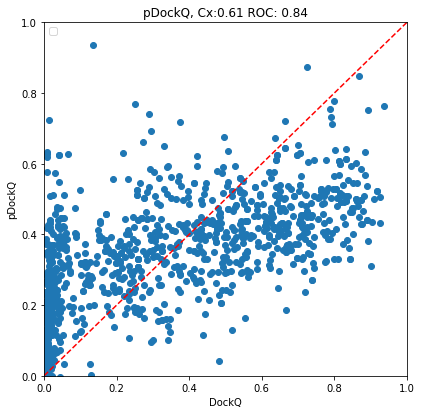

In [35]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
reg = LinearRegression()
cutoff=0.23
tempdf=df_struct.dropna(subset=["IF_plDDT","SumIF","NumRes","SeqLen"])
X=tempdf[["IF_plDDT","SumIF","NumRes","SeqLen"]]
Y=tempdf.DockQall
R=reg.fit(X,Y)
pred=reg.predict(X)
plt.scatter(Y,pred)
err=mean_squared_error(pred,Y)
correct=Y>cutoff            
#fig2.show()
fpr, tpr, threshold = metrics.roc_curve(correct, pred)
roc_auc = metrics.auc(fpr, tpr)
corr=np.corrcoef(Y,pred)[1,0]
ax.set_title('pDockQ, Cx:'+str(round(corr,2))+" ROC: "+str(round(roc_auc,2)))
    
plt.legend(loc = 'upper left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('pDockQ')
plt.xlabel('DockQ')
plt.savefig("pDockQ.png")
#print (corr,roc_auc)


/tmp/ipykernel_2485513/2873227871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf["pred"]=reg.predict(X)


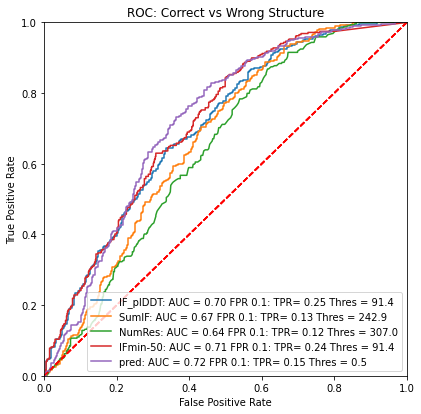

In [36]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=df_struct.dropna(subset=["IF_plDDT","SumIF","NumRes","SeqLen"])
correct=tempdf["GoodAll"]
X=tempdf[["IF_plDDT","SumIF","NumRes","SeqLen"]]
tempdf["pred"]=reg.predict(X)
for d in ["IF_plDDT","SumIF","NumRes","IFmin-50","pred"]:
    values=tempdf[d]
    fpr, tpr, threshold = metrics.roc_curve(correct, values)
    roc_auc = metrics.auc(fpr, tpr)
    t={}
    tp={}
    i=0
    while fpr[i]<0.01:
        i+=1
        t["99%"]=threshold[i]
        tp["99%"]=tpr[i]
    while fpr[i]<0.05:
        i+=1
        t["95%"]=threshold[i]
        tp["95%"]=tpr[i]
    while fpr[i]<0.1:
        i+=1
        t["90%"]=threshold[i]
        tp["90%"]=tpr[i]
    while fpr[i]<0.2:
        i+=1
        t["80%"]=threshold[i]
        tp["80%"]=tpr[i]
    while threshold[i]>70:
        i+=1
        t["X"]=threshold[i]
        tp["X"]=tpr[i]
    if (d=="IFmin-50"):
        ROC=np.c_[fpr,tpr,threshold]
        pd.DataFrame(ROC).to_csv("ROC-error.csv")
    plt.plot(fpr, tpr, label = d+': AUC = %0.2f' % roc_auc +
             " FPR 0.1: TPR= %0.2f" % tp["90%"] +" Thres = %0.1f" % t["90%"] )
    ax.set_title('ROC: Correct vs Wrong Structure')
    
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    i=0

   
plt.savefig("ROC-error.png")

In [37]:
df_struct[df_struct.MMall>0.9].dropna(subset=["IF_plDDT","SumIF","NumRes"]).sort_values("DockQall")

Unnamed: 0_x           Name  DockQ       MM    MMall  MMreorder  \
5992           794  Q13131-P54619  0.004  0.45326  0.96539    0.45326   
1988           246  P20618-P28074  0.004  0.17967  0.97122    0.17967   
7907           994  Q96DI7-Q99459  0.003  0.40672  0.90912    0.40672   
7908           995  Q96DI7-Q99459  0.003  0.40672  0.90912    0.40672   
7906           994  Q96DI7-Q99459  0.003  0.40672  0.90912    0.40672   
...            ...            ...    ...      ...      ...        ...   
6036           797  Q13283-Q9UN86  0.791  0.96055  0.97827    0.96055   
1708           208  P15927-P35244  0.670  0.94703  0.98493    0.94703   
1709           209  P15927-P35244  0.670  0.94703  0.98493    0.94703   
6796           891  Q676U5-Q9H1Y0  0.034  0.98492  0.98596    0.98492   
7869           988  Q96C36-P32322  0.426  0.88284  0.97949    0.88311   

      DockQreorder  DockQall  \
5992         0.005     0.005   
1988         0.004     0.006   
7907         0.006     0.006   
7908         0.006     0.006   
7906         0.006     0.006   
...            ...       ...   
6036         0.775     0.910   
1708         0.013     0.919   
1709         0.013     0.919   
6796         0.894     0.927   
7869         0.424     0.936   

                                                   File   PDB  ...   IFmin-10  \
5992  EXPERIMENTAL/c1125285_P54619_4RER_A_1_Q13131_4...  4RER  ...  71.824999   
1988  EXPERIMENTAL/c1211616_P20618_6MSE_f_1_P28074_6...  6MSE  ...  85.070412   
7907  EXPERIMENTAL/c1260673_Q96DI7_6QDV_O_1_Q99459_6...  6QDV  ...  62.256977   
7908  EXPERIMENTAL/c1260673_Q96DI7_6QDV_O_1_Q99459_6...  6QDV  ...  62.256977   
7906  EXPERIMENTAL/c1260673_Q96DI7_6QDV_O_1_Q99459_6...  6QDV  ...  62.256977   
...                                                 ...   ...  ...        ...   
6036  MODEL_MODEL/mmf1408828_Q13283_3q90_A_Q9UN86_3q...  3q90  ...  90.704177   
1708  EXPERIMENTAL/c1416390_P15927_2PI2_B_1_P35244_2...  2PI2  ...  94.552077   
1709  MODEL_MODEL/mmf1416390_P15927_2pi2_A_P35244_2p...  2pi2  ...  94.552077   
6796  EXPERIMENTAL/c1360118_Q676U5_5NPW_C_1_Q9H1Y0_5...  5NPW  ...  90.123018   
7869  MODEL_MODEL/mmf1372985_P32322_2izz_E_Q96C36_2r...  2izz  ...  96.647013   

     minres-20   IFmin-20  minres-30   IFmin-30  minres-50   IFmin-50  Struct  \
5992         1  71.824999          1  71.824999          1  71.824999    True   
1988         1  85.070412          1  85.070412          1  85.070412    True   
7907         1  62.256977          1  62.256977          1  62.256977    True   
7908         1  62.256977          1  62.256977          1  62.256977    True   
7906         1  62.256977          1  62.256977          1  62.256977    True   
...        ...        ...        ...        ...        ...        ...     ...   
6036         1  90.704177          1  90.704177          1  90.704177    True   
1708         1  94.552077          1  94.552077          1  94.552077    True   
1709         1  94.552077          1  94.552077          1  94.552077    True   
6796         1  90.123018          1  90.123018          1  90.123018    True   
7869         1  96.647013          1  96.647013          1  96.647013    True   

      GoodAll TMGoodAll  
5992    False      True  
1988    False      True  
7907    False      True  
7908    False      True  
7906    False      True  
...       ...       ...  
6036     True      True  
1708     True      True  
1709     True      True  
6796    False      True  
7869     True      True  

[427 rows x 62 columns]

In [43]:
df_negatome["GoodAll"]=False
df_negatome["Struct"]=False
df_negatome
#df_concat=pd.concat([df_negatome,df_struct])[["SeqLen","Name","IF_plDDT","plDDT","NumRes","SumIF","GoodAll","Struct"]+minIFcols]
#df_concat2=pd.concat([df_negatome,df_struct[df_struct.DockQ>0.23]])[["SeqLen","Name","IF_plDDT","plDDT","NumRes","SumIF","GoodAll","Struct"]+minIFcols]

#df_concat

Name  NumRes   IF_plDDT      plDDT  SeqLen1  SeqLen2  SeqLen  \
0     A1X4Q1-O14745     124  72.274413  65.719998      230    358.0   588.0   
1     A1X4Q1-Q15599      91  72.297193  66.258480      230    337.0   567.0   
2     A4IFA9-Q07731      52  87.512360  73.771585      394    211.0   605.0   
3     A6NIX2-O60663      66  63.069357  63.382271      430    402.0   832.0   
4     B2ZZS9-H2L8A6      86  66.239176  75.678471      400    745.0  1145.0   
...             ...     ...        ...        ...      ...      ...     ...   
1798  Q9YP87-P43488      50  68.312522  73.786038      186    198.0   384.0   
1799  Q9YP87-P48023      85  55.393979  75.154571      186    281.0   467.0   
1800  Q9YP87-P50591     111  81.650821  73.487518      186    281.0   467.0   
1801  Q9YP87-P50592     170  67.657178  72.455990      186    291.0   477.0   
1802  Q9YP87-Q06643     111  72.448837  73.137025      186    244.0   430.0   

           SumIF  minres-1    IFmin-1  ...  minres-10   IFmin-10  minres-20  \
0      89.620272         1  72.274413  ...          1  72.274413          1   
1      65.790446         1  72.297193  ...          1  72.297193          1   
2      45.506427         1  87.512360  ...          1  87.512360          1   
3      41.625776         1  63.069357  ...          1  63.069357          1   
4      56.965691         1  66.239176  ...          1  66.239176          1   
...          ...       ...        ...  ...        ...        ...        ...   
1798   34.156261         1  68.312522  ...          1  68.312522          1   
1799   47.084882         1  55.393979  ...          1  55.393979          1   
1800   90.632412         1  81.650821  ...          1  81.650821          1   
1801  115.017203         1  67.657178  ...          1  67.657178          1   
1802   80.418209         1  72.448837  ...          1  72.448837          1   

       IFmin-20  minres-30   IFmin-30  minres-50   IFmin-50  GoodAll  Struct  
0     72.274413          1  72.274413          1  72.274413    False   False  
1     72.297193          1  72.297193          1  72.297193    False   False  
2     87.512360          1  87.512360          1  87.512360    False   False  
3     63.069357          1  63.069357          1  63.069357    False   False  
4     66.239176          1  66.239176          1  66.239176    False   False  
...         ...        ...        ...        ...        ...      ...     ...  
1798  68.312522          1  68.312522          0   0.000000    False   False  
1799  55.393979          1  55.393979          1  55.393979    False   False  
1800  81.650821          1  81.650821          1  81.650821    False   False  
1801  67.657178          1  67.657178          1  67.657178    False   False  
1802  72.448837          1  72.448837          1  72.448837    False   False  

[1803 rows x 24 columns]

In [ ]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=df_concat.dropna()
correct=tempdf["Struct"]
X=tempdf[["IF_plDDT","SumIF","NumRes","SeqLen"]]
tempdf["pred"]=reg.predict(X)
#print (tempdf["IF_plDDT"])
for d in ["IF_plDDT","SumIF","NumRes","pred","IFmin-50"]:
    values=tempdf[d]
    fpr, tpr, threshold = metrics.roc_curve(correct, values)
    roc_auc = metrics.auc(fpr, tpr)
    t={}
    tp={}
    i=0
    while fpr[i]<0.01:
        i+=1
        t["99%"]=threshold[i]
        tp["99%"]=tpr[i]
    while fpr[i]<0.05:
        i+=1
        t["95%"]=threshold[i]
        tp["95%"]=tpr[i]
    while fpr[i]<0.1:
        i+=1
        t["90%"]=threshold[i]
        tp["90%"]=tpr[i]
    while fpr[i]<0.2:
        i+=1
        t["80%"]=threshold[i]
        tp["80%"]=tpr[i]
    if (d=="IFmin-50"):
        ROCnegatome=np.c_[fpr,tpr,threshold]
        pd.DataFrame(ROCnegatome).to_csv("ROC-negatome.csv")

    #print (d,t,tp,fpr,threshold)
    plt.plot(fpr, tpr, label = d+': AUC = %0.2f' % roc_auc +" FPR 0.1: TPR= %0.2f" % tp["90%"] +" Thres = %0.1f" % t["90%"] )
    #plt.plot(fpr, tpr, label = d+': AUC = %0.2f' % roc_auc)
    ax.set_title('ROC: Interaction vs Negatome')
    
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, .1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.savefig("ROC-negatome.png")

NameError: name 'reg' is not defined

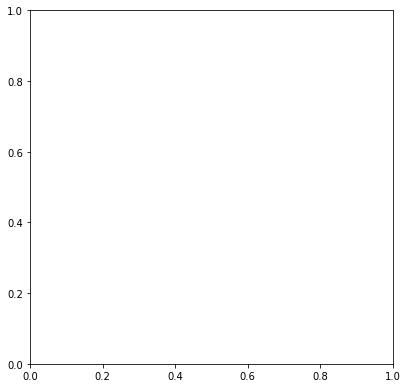

NameError: name 'reg' is not defined

In [12]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=df_concat2.dropna()
correct=tempdf["Struct"]
X=tempdf[["IF_plDDT","SumIF","NumRes","SeqLen"]]
tempdf["pred"]=reg.predict(X)

for d in ["IF_plDDT","SumIF","NumRes",'IFmin-50',"pred"]:
    values=tempdf[d]
    fpr, tpr, threshold = metrics.roc_curve(correct, values)
    roc_auc = metrics.auc(fpr, tpr)
    t={}
    tp={}
    i=0
    while fpr[i]<0.01:
        i+=1
        t["99%"]=threshold[i]
        tp["99%"]=tpr[i]
    while fpr[i]<0.05:
        i+=1
        t["95%"]=threshold[i]
        tp["95%"]=tpr[i]
    while fpr[i]<0.1:
        i+=1
        t["90%"]=threshold[i]
        tp["90%"]=tpr[i]
    while fpr[i]<0.2:
        i+=1
        t["80%"]=threshold[i]
        tp["80%"]=tpr[i]
    plt.plot(fpr, tpr, label = d+': AUC = %0.2f' % roc_auc +" FPR 0.1: TPR= %0.2f" % tp["90%"] +" Thres = %0.1f" % t["90%"] )
    #plt.plot(fpr, tpr, label = d+': AUC = %0.2f' % roc_auc)
    ax.set_title('Receiver Operating Characteristic')
    
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, .1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')


In [ ]:
ROC[:,0]

In [ ]:
plt.plot(ROC[:,2],ROC[:,0], label = "FPR: Good/Bad Models")
plt.plot(ROCnegatome[:,2],ROCnegatome[:,0], label = "FPR: Struct/Negatome")
plt.plot(ROC[:,2],ROC[:,1], label = "TPR: Good/Bad Models")
plt.plot(ROCnegatome[:,2],ROCnegatome[:,1], label = "TPR: Struct/Negatome")

ax.set_title('Threshold vs FPR')
    
plt.legend(loc = 'upper right')
#plt.plot([0, 0.2], [100, .2],'r--')
plt.plot([0,100], [0.1, 0.1],'r--')
plt.plot([70,70], [0, 1],'r--')
#plt.plot([0, 0.05], [100, .05],'r--')
#plt.plot([0, 0.01], [100, .01],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('False Positive Rate')
plt.xlabel('Threshold (IF_plDDT)')
plt.savefig("FPR-threshold.png")

In [ ]:
len(df_struct[(df_struct.IF_plDDT>80)&(df_struct.NumRes>50)])/len(df_struct)

In [ ]:
len(df_struct[(df_struct.IF_plDDT>80)&(df_struct.NumRes>50)])/len(df_struct)

In [ ]:
len(df_nostruct[(df_nostruct.IF_plDDT>80)&(df_nostruct.NumRes>50)])/len(df_nostruct)

In [ ]:
len(df_nostruct[(df_nostruct.IF_plDDT>80)])/len(df_nostruct)

In [ ]:
len(df_negatome[(df_negatome.IF_plDDT>80)&(df_negatome.NumRes>50)])/len(df_negatome)

In [ ]:
len(df_negatome[(df_negatome.IF_plDDT>80)])/len(df_negatome)

In [ ]:
for i in [50,60,70,75,80,85,90]:
    for j in [0,5,10,20,50,100]:
        struct=len(df_struct[(df_struct.IF_plDDT>i)&(df_struct.NumRes>j)])/len(df_struct)
        nostruct=len(df_nostruct[(df_nostruct.IF_plDDT>i)&(df_nostruct.NumRes>j)])/len(df_nostruct)
        negatome=len(df_negatome[(df_negatome.IF_plDDT>i)&(df_negatome.NumRes>j)])/len(df_negatome)
        ratiostr=struct/nostruct
        rationeg=(len(df_struct[(df_struct.IF_plDDT>i)&(df_struct.NumRes>50)])+len(df_nostruct[(df_nostruct.IF_plDDT>i)&(df_nostruct.NumRes>j)]))/(len(df_negatome[(df_negatome.IF_plDDT>i)&(df_negatome.NumRes>j)]))
        print (i,j,np.round(struct,2),np.round(nostruct,2),np.round(negatome,2),np.round(ratiostr,3),np.round(rationeg,3))

NameError: name 'df_struct' is not defined

In [19]:
for i in [50,60,70,75,80,85,90]:
    struct=len(df_struct[(df_struct.IF_plDDT>i)&(df_struct.NumRes>0)])/len(df_struct)
    nostruct=len(df_nostruct[(df_nostruct.IF_plDDT>i)&(df_nostruct.NumRes>0)])/len(df_nostruct)
    negatome=len(df_negatome[(df_negatome.IF_plDDT>i)&(df_negatome.NumRes>0)])/len(df_negatome)
    print (i,np.round(struct,2),np.round(nostruct,2),np.round(negatome,2))

60 0.93 0.68 0.72
70 0.81 0.43 0.31
75 0.71 0.32 0.19
80 0.57 0.21 0.11
85 0.38 0.12 0.05
90 0.21 0.04 0.01


In [44]:
from matplotlib_venn import venn3

In [1]:
minIF=70
minNum=50



set1=set(df_struct["Name"].to_list())
set2=set(df["Name"].to_list())
set3=set(df[(df.IF_plDDT>minIF)&(df.NumRes>minNum)]["Name"].to_list())
 
fig=venn3([set1, set2, set3], ('Structure', 'HuMap', 'Predicted'))

plt.savefig("../plots/venn-humap.png",dpi=600)
#set3

NameError: name 'df_struct' is not defined

In [ ]:


structPred=len(df_struct[(df_struct.IF_plDDT>i)&(df_struct.NumRes>j)])
nostructPred=len(df_nostruct[(df_nostruct.IF_plDDT>i)&(df_nostruct.NumRes>j)])

negatomePred=len(df_negatome[(df_negatome.IF_plDDT>i)&(df_negatome.NumRes>j)])

structNorPred=len(df_struct[(df_struct.IF_plDDT>i)&(df_struct.NumRes>j)])
nostructNotPred=len(df_nostruct[(df_nostruct.IF_plDDT>i)&(df_nostruct.NumRes>j)])
negatomeNotPred=len(df_negatome[(df_negatome.IF_plDDT>i)&(df_negatome.NumRes>j)])


print

venn3(subsets = (10, 8, 22, 6,9,4,
                 0))
venns

In [28]:
df_struct

Unnamed: 0_x           Name  DockQ       MM    MMall  MMreorder  \
0                2  O00231-O00487  0.510  0.64363  0.76284    0.64120   
1                3  O00231-Q15008  0.006  0.94567  0.94567    0.94567   
2                4  O00232-O00231  0.123  0.56706  0.73652    0.56751   
3                5  O00232-O00487  0.012  0.50276  0.71872    0.50227   
4                6  O00232-P51665  0.355  0.58063  0.76616    0.58130   
...            ...            ...    ...      ...      ...        ...   
1094          1249  Q9Y676-P82650  0.011  0.83740  0.83740    0.83707   
1095          1250  Q9Y676-P82930  0.004  0.42279  0.42281    0.42281   
1096          1251  Q9Y6G3-Q9NYK5  0.005  0.76297  0.76297    0.76297   
1097          1252  Q9Y6G5-Q9H0A8  0.021  0.42207  0.42207    0.42207   
1098          1253  Q9Y6G5-Q9NX08  0.311  0.69918  0.76228    0.69923   

      DockQreorder  DockQall  \
0            0.026     0.510   
1            0.562     0.562   
2            0.003     0.123   
3            0.025     0.025   
4            0.009     0.355   
...            ...       ...   
1094         0.395     0.395   
1095         0.146     0.146   
1096         0.210     0.210   
1097         0.021     0.021   
1098         0.064     0.311   

                                                   File   PDB  ...   IFmin-10  \
0     EXPERIMENTAL/c906866_O00487_5L4K_Q_1_O00231_5L...  5L4K  ...  84.629278   
1     EXPERIMENTAL/c906893_Q15008_5VHS_Y_1_O00231_5V...  5VHS  ...  73.733890   
2     EXPERIMENTAL/c906851_O00231_5VFQ_W_1_O00232_5V...  5VFQ  ...  76.586976   
3     EXPERIMENTAL/c943884_O00487_5T0H_c_1_O00232_5T...  5T0H  ...  81.655018   
4     EXPERIMENTAL/c943903_O00232_5L4K_P_1_P51665_5L...  5L4K  ...  75.944691   
...                                                 ...   ...  ...        ...   
1094  EXPERIMENTAL/c995795_Q9Y676_6NU3_AR_1_P82650_6...  6NU3  ...  83.218540   
1095  EXPERIMENTAL/c1005563_Q9Y676_6NU2_A0_1_P82930_...  6NU2  ...  83.078274   
1096  EXPERIMENTAL/c1082138_Q9NYK5_6ZSE_7_1_Q9Y6G3_6...  6ZSE  ...  83.708039   
1097  MODEL_MODEL/mmf1285330_Q9H0A8_6bp6_A_Q9Y6G5_6b...  6bp6  ...  84.510167   
1098  MODEL_MODEL/mmf1111421_Q9Y6G5_6bp6_A_Q9NX08_6b...  6bp6  ...  87.252451   

     minres-20   IFmin-20  minres-30   IFmin-30  minres-50   IFmin-50  Struct  \
0            1  84.629278          1  84.629278          1  84.629278    True   
1            1  73.733890          1  73.733890          1  73.733890    True   
2            1  76.586976          1  76.586976          1  76.586976    True   
3            1  81.655018          1  81.655018          1  81.655018    True   
4            1  75.944691          1  75.944691          1  75.944691    True   
...        ...        ...        ...        ...        ...        ...     ...   
1094         1  83.218540          1  83.218540          1  83.218540    True   
1095         1  83.078274          1  83.078274          1  83.078274    True   
1096         1  83.708039          1  83.708039          1  83.708039    True   
1097         1  84.510167          1  84.510167          1  84.510167    True   
1098         1  87.252451          1  87.252451          1  87.252451    True   

      GoodAll  TMGoodAll  
0        True       True  
1       False       True  
2       False       True  
3       False       True  
4        True       True  
...       ...        ...  
1094    False       True  
1095    False      False  
1096    False       True  
1097    False      False  
1098     True       True  

[1099 rows x 55 columns]

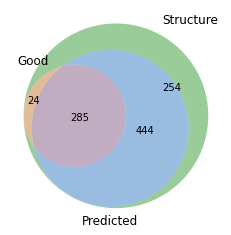

In [56]:
# Making some venn diagrams
minIF=70
minNum=50
set1=set(df_struct[df_struct.GoodAll]["Name"].to_list())
set2=set(df_struct["Name"].to_list())
set3=set(df_struct[(df_struct.IF_plDDT>minIF)&(df_struct.NumRes>minNum)]["Name"].to_list())
 
fig=venn3([set1, set2, set3], ('Good', 'Structure', 'Predicted'))

plt.savefig("../plots/venn-structure.png",dpi=600)


In [110]:
df_HuRI.keys()

Index(['Name', 'id1', 'id2', 'NumRes', 'IF_plDDT', 'plDDT', 'UniProt_x',
       'Ensembl_x', 'UniProt_y', 'Ensembl_y', 'Name1', 'Name2'],
      dtype='object')

In [119]:
tempdf1=df.dropna(subset=["id1","id2","IF_plDDT","NumRes"])[["id1","id2","IF_plDDT","NumRes"]]
tempdf2=df_HuRI.dropna(subset=["UniProt_y","UniProt_x","IF_plDDT","NumRes"])[["id1","id2","IF_plDDT","NumRes"]]
tempdf2=tempdf2.rename(columns={"UniProt_x":"id1","UniProt_u":"id2"})
tempdf1["Name"]=['-'.join(sorted(tup)) for tup in zip(tempdf1['id1'], tempdf1['id2'])]
tempdf2["Name"]=['-'.join(sorted(tup)) for tup in zip(tempdf2['id1'], tempdf2['id2'])]
tempdf1["Method"]="HuMap"
tempdf2["Method"]="HuRI"
tempdf=pd.concat([tempdf1,tempdf2])


In [ ]:

set1=set(tempdf[tempdf.Method=="HuRI"][["Name"]].to_list())
set2=set(tempdf[tempdf.Method=="HuMap"][["Name"]].to_list())
set3=set(tempdf[(df.IF_plDDT>minIF)&(df.NumRes>minNum)]["Name"].to_list())
 
fig=venn3([set1, set2, set3], ('HuRI', 'HuMap', 'Predicted'))



In [114]:
tempdf2

id1              id2   IF_plDDT  NumRes
11     ENSG00000104765  ENSG00000104765  79.178759    70.0
225    ENSG00000163472  ENSG00000163472  73.905149   168.0
235    ENSG00000051128  ENSG00000169379  84.627478     5.0
236    ENSG00000064601  ENSG00000169379  60.949908    25.0
237    ENSG00000070081  ENSG00000169379  69.242198    49.0
...                ...              ...        ...     ...
44549  ENSG00000163217  ENSG00000167633  64.311682    40.0
44587  ENSG00000165584  ENSG00000172785  58.486667    72.0
44588  ENSG00000165724  ENSG00000172785  75.359839    63.0
44591  ENSG00000177674  ENSG00000189403  53.028632     7.0
44607  ENSG00000177674  ENSG00000205707  75.370348    28.0

[4759 rows x 4 columns]